# STA 141B: Homework 3

Fall 2018

## Information

After the colons (in the same line) please write just your first name, last name, and the 9 digit student ID number below.

First Name: Kevin

Last Name: Chu

Student ID: 913077890

## Instructions

### New item: Please print your answer notebook to pdf (make sure that it is not too many pages, > 10, due to long output) and submit as the homework solution with your zip file.

We use a script that extracts your answers by looking for cells in between the cells containing the exercise statements.  So you 

- MUST add cells in between the exercise statements and add answers within them and
- MUST NOT modify the existing cells, particularly not the problem statement

To make markdown, please switch the cell type to markdown (from code) - you can hit 'm' when you are in command mode - and use the markdown language.  For a brief tutorial see: https://daringfireball.net/projects/markdown/syntax

### Introduction

The US Department of Agriculture publishes price estimates for fruits and vegetables [online](https://www.ers.usda.gov/data-products/fruit-and-vegetable-prices/fruit-and-vegetable-prices/). The most recent estimates are based on a 2013 survey of US retail stores.

The estimates are provided as a collection of MS Excel files, with one file per fruit or vegetable. The `hw3_data.zip` file contains the fruit and vegetable files in the directories `fruit` and `vegetables`, respectively.

__Exercise 1.__ Use pandas to extract the "Fresh" row(s) from the <strong style="color:#B0B">fruit</strong> Excel files. Combine the data into a single data frame. Your data frame should look something like this:

type       | food       | form   | price_per_lb | yield | lb_per_cup | price_per_cup
---------- | ---------- | ------ | ------------ | ----- | ---------- | -------------
fruit      | watermelon | Fresh1 | 0.333412     | 0.52  | 0.330693   | 0.212033
fruit      | cantaloupe | Fresh1 | 0.535874     | 0.51  | 0.374786   | 0.3938
vegetables | onions     | Fresh1 | 1.03811      | 0.9   | 0.35274    | 0.406868
...        |            |        |              |       |            |


It's okay if the rows and columns of your data frame are in a different order. These modules are especially relevant:

* [`str` methods](https://docs.python.org/2/library/stdtypes.html#string-methods)
* [`os`](https://docs.python.org/2/library/os.html)
* [`os.path`](https://docs.python.org/2/library/os.path.html)
* [pandas](http://pandas.pydata.org/pandas-docs/stable/): `read_excel()`, `concat()`, `.fillna()`, `.str`, plotting methods

Ask questions and search the documentation/web to find the functions you need.


In [1]:
#Collaborated with Andrew Le about using .str.contains()

import pandas as pd
import os

def fresh_fun(path, food):
    """
    Function takes a file path, reads all the excel files in that file path, and 
    creates a single dataframe of the rows containing "Fresh" form. Afterwards 
    it restructures the dataframe into the desired output.
    
    Parameters
    ----------
    path: str value of the file path
    food: str value of the type of food e.g. ("fruit", "vegetables")
    
    Returns
    ----------
    fresh_data: pandas dataframe of just the "Fresh" rows from all the excel files 
    that were read
    """
    file_path = os.path.join(path, food)
    files = os.listdir(file_path)
    files.sort()
    data = pd.DataFrame()
    
    for file in files:
        excel_files = pd.read_excel(file_path + "/" + file, header = 1)
        excel_files["food"] = file.split(".")[0]
        excel_files["type"] = food
        data = pd.concat([data, excel_files], sort = True)
        
    fresh_data = data[data["Form"].str.contains('Fresh').fillna(False)]
    fresh_data = fresh_data.drop(columns = ["Unnamed: 2", "Unnamed: 5", 
                                            "Unnamed: 7", "Unnamed: 8"])
    fresh_data = fresh_data.rename(columns = {"Average price": "price_per_cup", 
                                              "Average retail price ": "price_per_lb",
                                              "Preparation": "yield", 
                                              "Size of a ": "lb_per_cup", 
                                              "Form": "form"})
    fresh_data = fresh_data[["type", "food", "form", "price_per_lb", "yield", 
                             "lb_per_cup", "price_per_cup"]]
    
    return(fresh_data)

path = "C:\\Users\\WoH\\Desktop\\Python\\STATS 141B\\hw3"
fruit = "fruit"

fresh_fruit = fresh_fun(path, fruit)
fresh_fruit = fresh_fruit.reset_index(drop = True)
print("# of rows in fresh_fruit: ", len(fresh_fruit))
fresh_fruit.head()

# of rows in fresh_fruit:  24


,type,food,form,price_per_lb,yield,lb_per_cup,price_per_cup
0,fruit,apples,Fresh1,1.56752,0.9,0.242508,0.422373
1,fruit,apricots,Fresh1,3.04007,0.93,0.363763,1.1891
2,fruit,bananas,Fresh1,0.566983,0.64,0.330693,0.292965
3,fruit,blackberries,Fresh1,5.77471,0.96,0.31967,1.92292
4,fruit,blueberries,Fresh1,4.73462,0.95,0.31967,1.59318


__Exercise 2.__ Reuse your code from exercise 1.1 to extract the "Fresh" row(s) from the <strong style="color:#B0B">vegetable</strong> Excel files.

Does your code produce the correct prices for tomatoes? If not, why not? Do any other files have the same problem as the tomatoes file?

You don't need to extract the prices for these problem files. However, make sure the prices are extracted for files like asparagus that don't have this problem.

In [2]:
path = "C:\\Users\\WoH\\Desktop\\Python\\STATS 141B\\hw3"
vegetables = "vegetables"

fresh_veg = fresh_fun(path, vegetables)
fresh_veg = fresh_veg.reset_index(drop = True)

#Need to fix food names because the values at pairs (7,8) and (14,15) are the same
fresh_veg.loc[7, "food"] = "green_cabbage"
fresh_veg.loc[8, "food"] = "red_cababage"
fresh_veg.loc[14, "food"] = "unpeeled_cucumber"
fresh_veg.loc[15, "food"] = "peeled_cucumber"

print("# of rows in fresh_veg: ", len(fresh_veg))
fresh_veg.head()

# of rows in fresh_veg:  33


,type,food,form,price_per_lb,yield,lb_per_cup,price_per_cup
0,vegetables,acorn_squash,Fresh1,1.17225,0.458554,0.451948,1.15536
1,vegetables,artichoke,Fresh1,2.21305,0.375309,0.385809,2.27497
2,vegetables,asparagus,Fresh1,3.21349,0.493835,0.396832,2.58227
3,vegetables,avocados,Fresh1,2.23587,0.740753,0.31967,0.964886
4,vegetables,broccoli,Fresh,,,,NaN


__Does your code produce the correct prices for tomatoes? If not, why not? Do any other files have the same problem as the tomatoes file?__

No, my code does not produce the correct prices for tomatoes because the values are missing. Other files with this same problem are broccoli, carrots, cauliflower, celery, lettuce_romaine, mushrooms, and spinach.

__Exercise 3.__ Remove rows without a price from the vegetable data frame and then combine the fruit and vegetable data frames. Make sure all columns of numbers are numeric (not strings).

In [3]:
fresh_veg_drop = fresh_veg.dropna()
fruit_veg = pd.concat([fresh_fruit, fresh_veg_drop])
print("# of columns in fresh_veg_drop: ", len(fresh_veg_drop))
print("# of rows in fruit_veg: ", len(fruit_veg))
fruit_veg.head()

# of columns in fresh_veg_drop:  25
# of rows in fruit_veg:  49


,type,food,form,price_per_lb,yield,lb_per_cup,price_per_cup
0,fruit,apples,Fresh1,1.56752,0.9,0.242508,0.422373
1,fruit,apricots,Fresh1,3.04007,0.93,0.363763,1.1891
2,fruit,bananas,Fresh1,0.566983,0.64,0.330693,0.292965
3,fruit,blackberries,Fresh1,5.77471,0.96,0.31967,1.92292
4,fruit,blueberries,Fresh1,4.73462,0.95,0.31967,1.59318


In [4]:
float_col = ["price_per_lb", "yield", "lb_per_cup", "price_per_cup"]
for col in float_col:
    fruit_veg[col] = fruit_veg[col].astype(float)

fruit_veg.dtypes

type              object
food              object
form              object
price_per_lb     float64
yield            float64
lb_per_cup       float64
price_per_cup    float64
dtype: object

__Exercise 4.__ Discuss the questions below (a paragraph each is sufficient). Use plots to support your ideas.

* What kinds of fruits are the most expensive (per pound)? What kinds are the least expensive?
* How do the price distributions compare for fruit and vegetables?
* Which foods are the best value for the price?
* What's something surprising about this data set?
* Which foods do you expect to provide the best combination of price, yield, and nutrition? A future assignment may combine this data set with another so you can check your hypothesis.

In [5]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10]

sorted_fruit_price = fresh_fruit.sort_values(["price_per_lb"])

fig, ax = plt.subplots()
price_plot = ax.barh(sorted_fruit_price["food"], sorted_fruit_price["price_per_lb"])
ax.set_xlabel("price_per_lb")
ax.set_ylabel("type of fruit")
ax.set_title("price_per_lb vs type of fruit plot")
plt.show()

<Figure size 1000x1000 with 1 Axes>

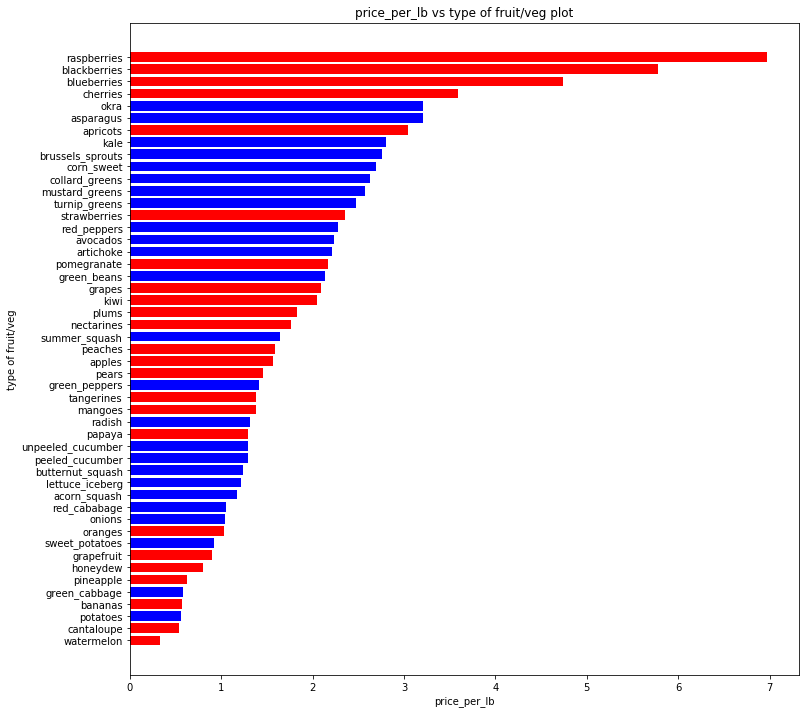

In [6]:
plt.rcParams['figure.figsize'] = [12, 12]

sorted_fruit_veg = fruit_veg.sort_values(["price_per_lb"])
sorted_fruit_veg["colors"] = 'r'
sorted_fruit_veg.loc[sorted_fruit_veg["type"] == "vegetables", "colors"] = 'b'

fig, ax = plt.subplots()
fruit_veg_plot = ax.barh(sorted_fruit_veg["food"], sorted_fruit_veg["price_per_lb"], 
                         color = sorted_fruit_veg["colors"])
ax.set_xlabel("price_per_lb")
ax.set_ylabel("type of fruit/veg")
ax.set_title("price_per_lb vs type of fruit/veg plot")
plt.show()
    

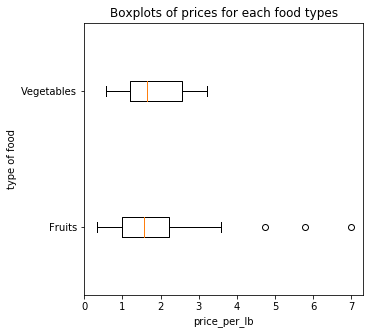

In [7]:
plt.rcParams['figure.figsize'] = [5, 5]

fruit_prices = sorted_fruit_price["price_per_lb"].tolist()
veg_prices = fresh_veg_drop["price_per_lb"].tolist()
price_data = [fruit_prices, veg_prices]

fig, ax = plt.subplots()
ax.boxplot(price_data, vert = False, labels = ["Fruits", "Vegetables"])
ax.set_title("Boxplots of prices for each food types")
ax.set_xlabel("price_per_lb")
ax.set_ylabel("type of food")
plt.show()

__What kinds of fruits are the most expensive (per pound)? What kinds are the least expensive?__

From the first plot (price_per_lb vs type of fruit plot), it seems that small fruits like raspberries, blueberries, and blackberries are generally the most expensive. All 3 of these fruits are berries and have high yield percentages. The cheapest fruits are watermelons, cantaloupes, and bananas. These fruits all have a relatively low yield compared to the other fruits.

__How do the price distributions compare for fruit and vegetables?__

From the second plot (price_per_lb vs type of fruit/veg plot), it appears that the most expensive fruits are more expensive than the most expensive vegetables. This was interesting to me so I decided to make a boxplot of each food type's price_per_lb. From the boxplots, it appears that the three most expensive fruits (raspberries, blackberries, and blueberries) are outliers compared to the prices of the other fruits. The first quartile and mean are around the same for both the food types but the third quartile is noticably higher for the vegetables.

__Which foods are the best value for the price?__

In my opinion, the best values for the price foods are the ones that are cheapest per pound. In this case based on the second plot (price_per_lb vs type of fruit/veg plot), the 3 best value foods for their respective prices are watermelons, cantaloupes, and potatoes.

__What's something surprising about this data set?__

Something surprising about this data set is that the cheapest fruits are generally low in yield while the cheapest vegetables are generally high in yield.

__Which foods do you expect to provide the best combination of price, yield, and nutrition? A future assignment may combine this data set with another so you can check your hypothesis.__

__ Lifeng mentioned in an email that since we do not have all the necessary information there is no need to answer this question__
